In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [41]:
data = pd.read_excel("DataBCHeadset.xlsx")

In [42]:
data.head()

,Country,University,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,Simon Fraser University,NaN,NaN,NaN,NaN,2.0,2.0,2.0,3.0,1.0,NaN
1,NaN,The University of British Columbia (Okanagan),NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,2.0,2.0
2,NaN,The University of British Columbia (Vancouver),NaN,NaN,1.0,1.0,3.0,3.0,4.0,4.0,3.0,2.0
3,NaN,The University of Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,NaN,Thompson Rivers University,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [43]:
data['Country'] = data['Country'].ffill()

#remove Canada from the dataframe
data = data[data['Country'] != 'Canada']

In [44]:
data.columns

Index([   'Country', 'University',         2013,         2014,         2015,
               2016,         2017,         2018,         2019,         2020,
               2021,         2022],
      dtype='object')

In [45]:
year_columns = [int(year) for year in range(2013, 2023)]
data[year_columns] = data[year_columns].fillna(0)

In [46]:
data

,Country,University,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,Simon Fraser University,0.0,0.0,0.0,0.0,2.0,2.0,2.0,3.0,1.0,0.0
1,Afghanistan,The University of British Columbia (Okanagan),0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0
2,Afghanistan,The University of British Columbia (Vancouver),0.0,0.0,1.0,1.0,3.0,3.0,4.0,4.0,3.0,2.0
3,Afghanistan,The University of Victoria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Afghanistan,Thompson Rivers University,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,Unknown/Stateless,The University of British Columbia (Vancouver),45.0,13.0,4.0,5.0,4.0,5.0,6.0,6.0,7.0,6.0
886,Unknown/Stateless,The University of Northern British Columbia,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
887,Unknown/Stateless,The University of Victoria,17.0,6.0,4.0,6.0,4.0,5.0,3.0,0.0,0.0,0.0
888,Unknown/Stateless,Thompson Rivers University,298.0,79.0,58.0,17.0,25.0,42.0,49.0,81.0,61.0,46.0


In [47]:
# Convert the dataset from wide to long format
data_long = pd.melt(data, id_vars=['Country', 'University'], var_name='Year', value_name='Enrollment')
data_long['Year'] = data_long['Year'].astype(int)  # Ensure the 'Year' column is of integer type
data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')  # Convert Enrollment to numeric, setting errors='coerce' will convert non-numeric values to NaN


In [48]:
data_long

,Country,University,Year,Enrollment
0,Afghanistan,Simon Fraser University,2013,0.0
1,Afghanistan,The University of British Columbia (Okanagan),2013,0.0
2,Afghanistan,The University of British Columbia (Vancouver),2013,0.0
3,Afghanistan,The University of Victoria,2013,0.0
4,Afghanistan,Thompson Rivers University,2013,1.0
...,...,...,...,...
8875,Unknown/Stateless,The University of British Columbia (Vancouver),2022,6.0
8876,Unknown/Stateless,The University of Northern British Columbia,2022,0.0
8877,Unknown/Stateless,The University of Victoria,2022,0.0
8878,Unknown/Stateless,Thompson Rivers University,2022,46.0


In [49]:
data_long=data_long[data_long['Country']!= 'Grand Total']

In [50]:
# Create a column for 2013 enrollment values by mapping from a series created from the 2013 data
data_long['Enrollment_2013'] = data_long.set_index(['Country', 'University']).index.map(data_long[data_long['Year'] == 2013].set_index(['Country', 'University'])['Enrollment'])

# Now calculate the growth since 2013 for each row
data_long['Growth_Since_2013'] = (data_long['Enrollment_2013'] - data_long['Enrollment']) / data_long['Enrollment'] * 100

data_long.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\Dewang\AppData\Local\Temp\ipykernel_10064\1536147881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Enrollment_2013'] = data_long.set_index(['Country', 'University']).index.map(data_long[data_long['Year'] == 2013].set_index(['Country', 'University'])['Enrollment'])
C:\Users\Dewang\AppData\Local\Temp\ipykernel_10064\1536147881.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Growth_Since_2013'] = (data_long['Enrollment_2013'] - data_long['Enrollment']) / data_long['Enro

In [51]:
data_long

,Country,University,Year,Enrollment,Enrollment_2013,Growth_Since_2013
0,Afghanistan,Simon Fraser University,2013,0.0,0.0,NaN
1,Afghanistan,The University of British Columbia (Okanagan),2013,0.0,0.0,NaN
2,Afghanistan,The University of British Columbia (Vancouver),2013,0.0,0.0,NaN
3,Afghanistan,The University of Victoria,2013,0.0,0.0,NaN
4,Afghanistan,Thompson Rivers University,2013,1.0,1.0,0.000000
...,...,...,...,...,...,...
8874,Unknown/Stateless,The University of British Columbia (Okanagan),2022,2.0,0.0,-100.000000
8875,Unknown/Stateless,The University of British Columbia (Vancouver),2022,6.0,45.0,650.000000
8876,Unknown/Stateless,The University of Northern British Columbia,2022,0.0,0.0,NaN
8877,Unknown/Stateless,The University of Victoria,2022,0.0,17.0,NaN


In [52]:
data_long.to_excel("test.xlsx")

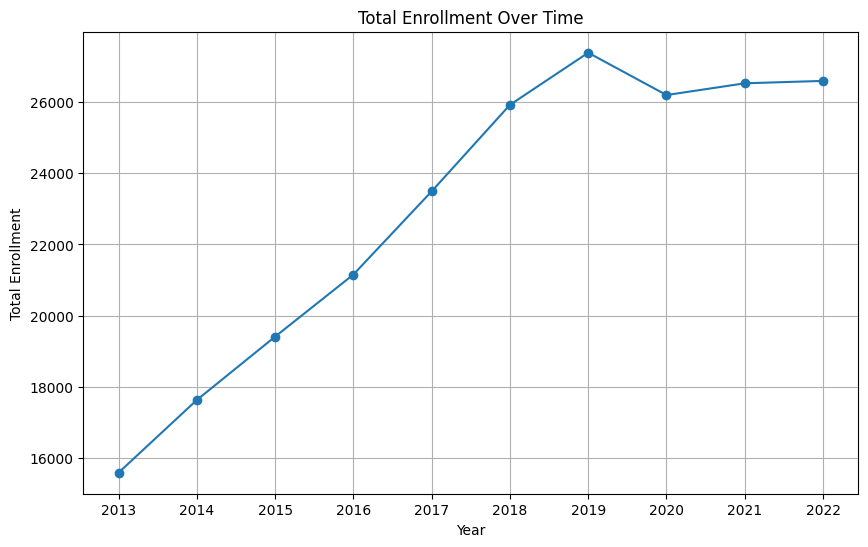

In [53]:
# Total enrollment over time
plt.figure(figsize=(10, 6))
data_long.groupby('Year')['Enrollment'].sum().plot(kind='line', marker='o')
plt.xticks(data_long['Year'].unique())
plt.title('Total Enrollment Over Time')
plt.xlabel('Year')
plt.ylabel('Total Enrollment')
plt.grid(True)
plt.show()

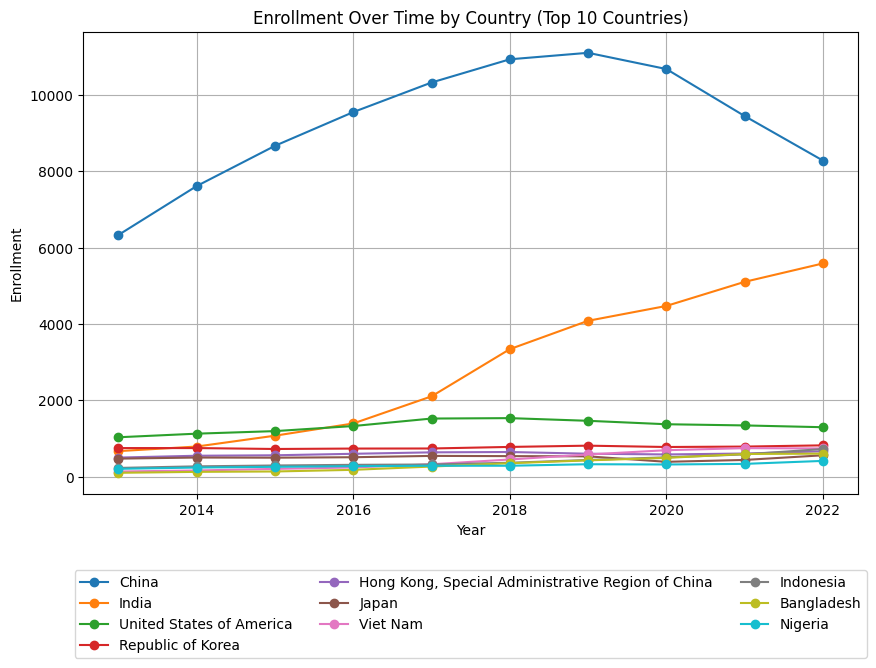

In [54]:
# Enrollment by Country over time for the top 10 countries
plt.figure(figsize=(10, 6))
top_countries = data_long.groupby('Country')['Enrollment'].sum().nlargest(10).index
for country in top_countries:
    data_country = data_long[data_long['Country'] == country]
    data_country.groupby('Year')['Enrollment'].sum().plot(kind='line', marker='o', label=country)
plt.title('Enrollment Over Time by Country (Top 10 Countries)')
plt.xlabel('Year')
plt.ylabel('Enrollment')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(True)
plt.show()

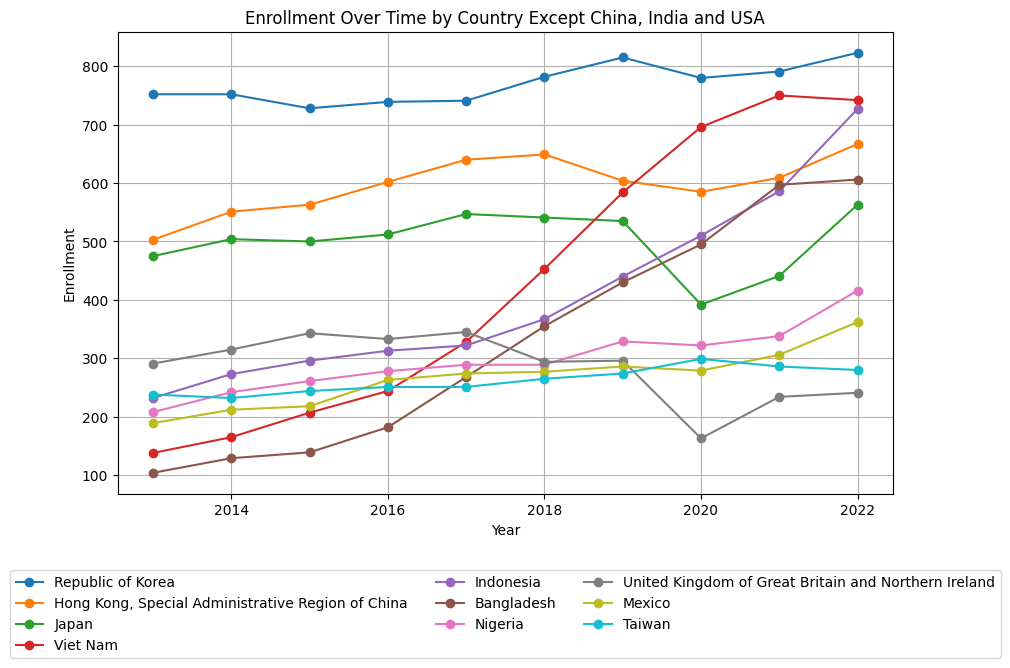

In [55]:
# Enrollment by Country over time for the top 10 countries except China, India and USA
plt.figure(figsize=(10, 6))
top_countries = data_long.groupby('Country')['Enrollment'].sum().nlargest(13).index
top_countries = top_countries[3:]
for country in top_countries:
    data_country = data_long[data_long['Country'] == country]
    data_country.groupby('Year')['Enrollment'].sum().plot(kind='line', marker='o', label=country)
plt.title('Enrollment Over Time by Country Except China, India and USA')
plt.xlabel('Year')
plt.ylabel('Enrollment')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(True)
plt.show()

# Year on Year Growth

## Last 10 years

In [56]:
# Convert 'Year' and 'Enrollment' to numeric
data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')

# Specify the period of interest
last_year = 2022
start_year = 2013

# Filter countries with more than 100 students in 2023
countries_with_100_plus = data_long[(data_long['Year'] == last_year) & (data_long['Enrollment'] > 100)]['Country'].unique()

# Calculate total enrollment for each country at the start and end of the period, only for countries with more than 100 students in 2023
start_totals = data_long[(data_long['Year'] == start_year) & (data_long['Country'].isin(countries_with_100_plus))].groupby('Country')['Enrollment'].sum()
end_totals = data_long[(data_long['Year'] == last_year) & (data_long['Country'].isin(countries_with_100_plus))].groupby('Country')['Enrollment'].sum()

# Calculate growth rates for these countries
growth_rates = ((end_totals - start_totals) / start_totals) * 100

# Remove any NaN or infinite values that may have resulted from division by zero
growth_rates = growth_rates.replace([np.inf, -np.inf], np.nan).dropna()

print("Top 10 Fastest Growing Countries (Based on Enrollment Growth Rate, with more than 100 students in 2023):")
print(growth_rates.nlargest(10))

Top 10 Fastest Growing Countries (Based on Enrollment Growth Rate, with more than 100 students in 2023):
Country
India                         731.398810
Bangladesh                    482.692308
Viet Nam                      437.681159
Iran (Islamic Republic of)    422.077922
Philippines                   256.923077
Zimbabwe                      232.608696
Indonesia                     213.362069
Turkey                        186.666667
Brazil                        114.400000
Nigeria                       100.000000
Name: Enrollment, dtype: float64


C:\Users\Dewang\AppData\Local\Temp\ipykernel_10064\2264317157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
C:\Users\Dewang\AppData\Local\Temp\ipykernel_10064\2264317157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')


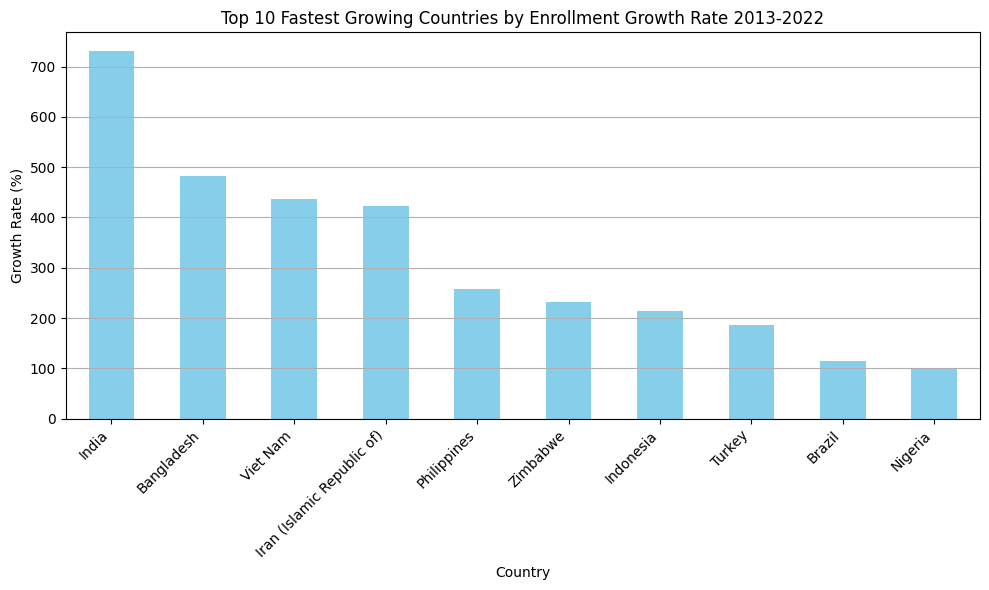

In [57]:
growth_rates.nlargest(10).plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Top 10 Fastest Growing Countries by Enrollment Growth Rate 2013-2022')
plt.xlabel('Country')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\Dewang\AppData\Local\Temp\ipykernel_10064\357827942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
C:\Users\Dewang\AppData\Local\Temp\ipykernel_10064\357827942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')


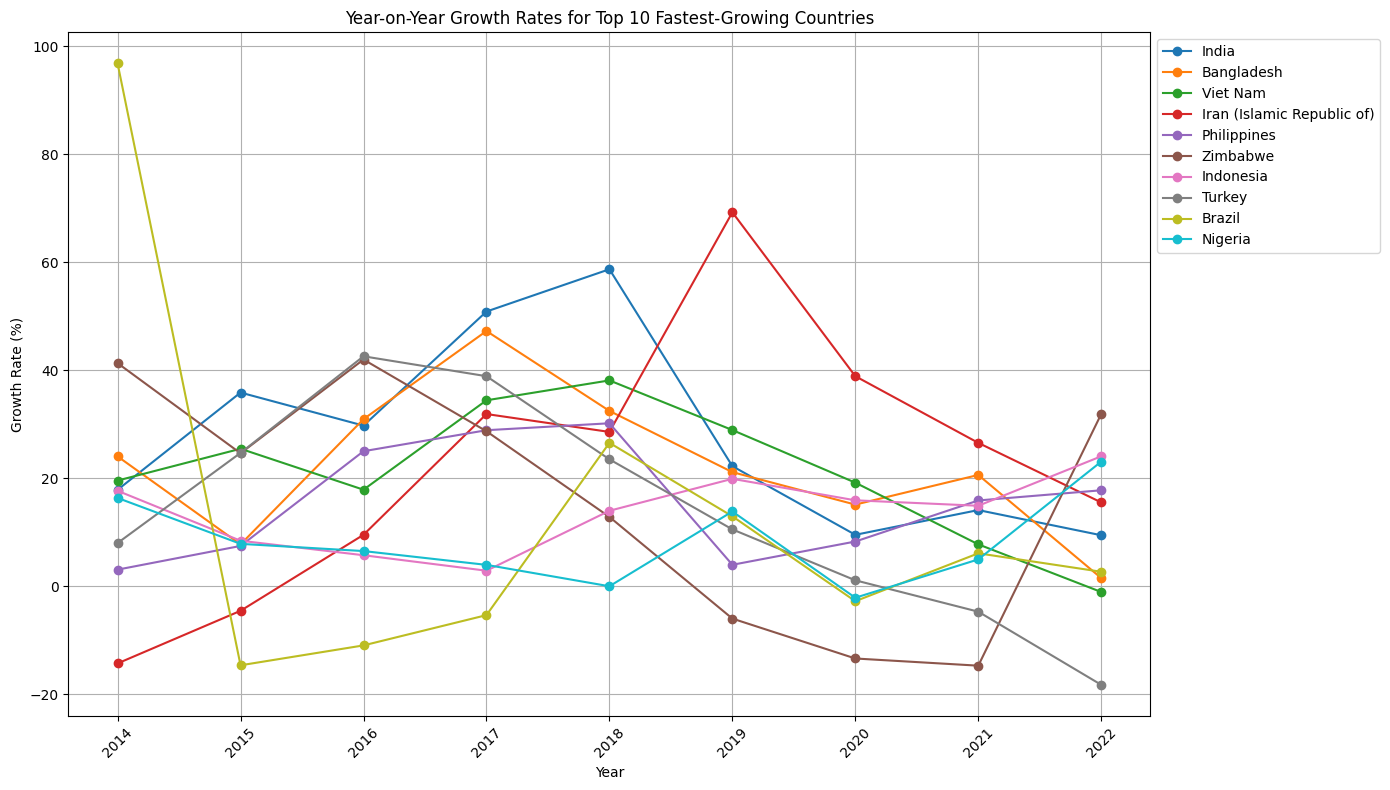

In [58]:
# Convert 'Year' and 'Enrollment' to numeric if they're not already
data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')

# Pivot data to have years as columns for each country
pivot_df = data_long.pivot_table(index='Country', columns='Year', values='Enrollment', aggfunc='sum')

# Calculate year-on-year percentage growth for each country
year_on_year_growth = pivot_df.pct_change(axis=1) * 100

# Filter for only the top 10 countries
top_10_growth = year_on_year_growth.loc[growth_rates.nlargest(10).index]

# Plotting
plt.figure(figsize=(14, 8))

# Ensure the DataFrame is not empty
if not top_10_growth.empty:
    for country in growth_rates.nlargest(10).index:
        # Some countries might not have complete data for all years, leading to NaN values in year-on-year growth.
        # Ensure there's data for at least one year before attempting to plot.
        if country in top_10_growth.index and not top_10_growth.loc[country].isnull().all():
            plt.plot(top_10_growth.columns, top_10_growth.loc[country], marker='o', label=country)
        else:
            print(f"Skipping {country} due to insufficient data.")

    plt.title('Year-on-Year Growth Rates for Top 10 Fastest-Growing Countries')
    plt.xlabel('Year')
    plt.ylabel('Growth Rate (%)')
    plt.xticks(rotation=45)  # Assuming the years are properly ordered; if not, you might need to sort them first.
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for the top 10 countries.")

## Last 5 years

In [59]:
# Convert 'Year' and 'Enrollment' to numeric
data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')

# Specify the period of interest
last_year = 2022
start_year = 2018

# Filter countries with more than 100 students in 2023
countries_with_100_plus = data_long[(data_long['Year'] == last_year) & (data_long['Enrollment'] > 100)]['Country'].unique()

# Calculate total enrollment for each country at the start and end of the period, only for countries with more than 100 students in 2023
start_totals = data_long[(data_long['Year'] == start_year) & (data_long['Country'].isin(countries_with_100_plus))].groupby('Country')['Enrollment'].sum()
end_totals = data_long[(data_long['Year'] == last_year) & (data_long['Country'].isin(countries_with_100_plus))].groupby('Country')['Enrollment'].sum()

# Calculate growth rates for these countries
growth_rates = ((end_totals - start_totals) / start_totals) * 100

# Remove any NaN or infinite values that may have resulted from division by zero
growth_rates = growth_rates.replace([np.inf, -np.inf], np.nan).dropna()

print("Top 10 Fastest Growing Countries (Based on Enrollment Growth Rate, with more than 100 students in 2023):")
print(growth_rates.nlargest(10))

Top 10 Fastest Growing Countries (Based on Enrollment Growth Rate, with more than 100 students in 2023):
Country
Iran (Islamic Republic of)    243.589744
Indonesia                      98.092643
Bangladesh                     70.704225
India                          67.175344
Viet Nam                       63.796909
Philippines                    53.642384
Nigeria                        43.944637
Mexico                         30.685921
Brazil                         19.642857
Thailand                        6.285714
Name: Enrollment, dtype: float64


C:\Users\Dewang\AppData\Local\Temp\ipykernel_10064\3833124204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
C:\Users\Dewang\AppData\Local\Temp\ipykernel_10064\3833124204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')


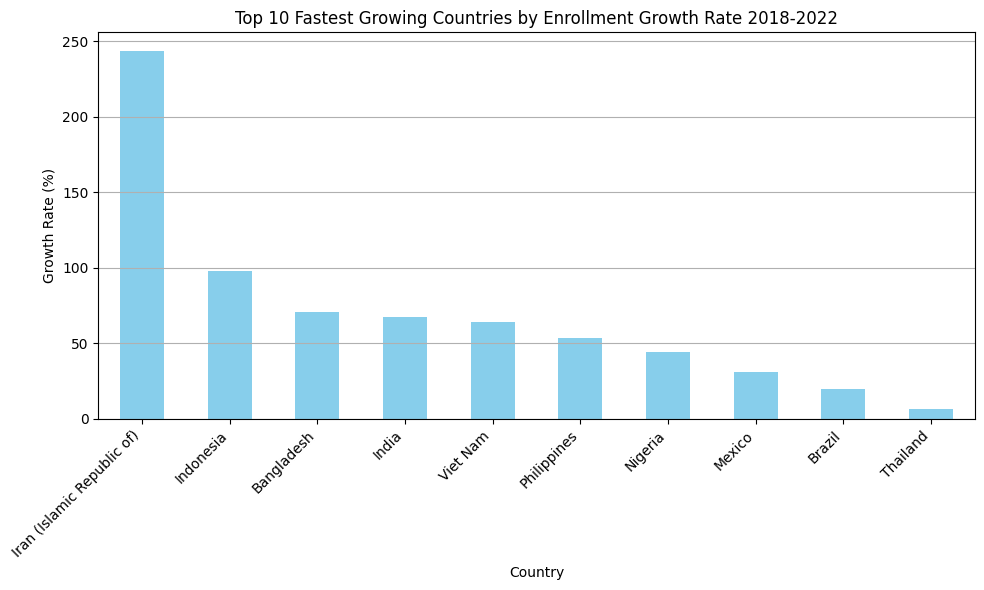

In [60]:
growth_rates.nlargest(10).plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Top 10 Fastest Growing Countries by Enrollment Growth Rate 2018-2022')
plt.xlabel('Country')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\Dewang\AppData\Local\Temp\ipykernel_10064\1222126664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
C:\Users\Dewang\AppData\Local\Temp\ipykernel_10064\1222126664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')


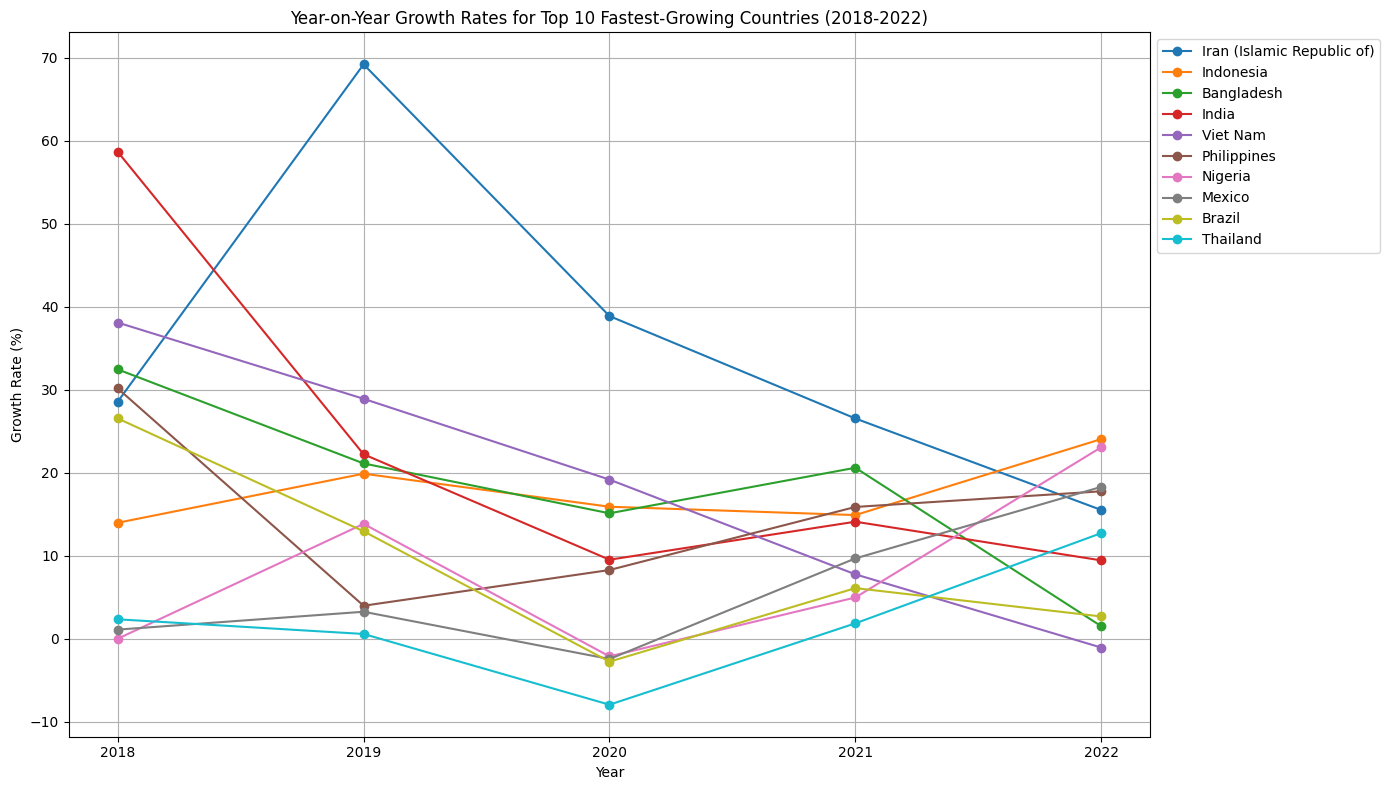

In [61]:
# Convert 'Year' and 'Enrollment' to numeric if they're not already
data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')

# Pivot data to have years as columns for each country
pivot_df = data_long.pivot_table(index='Country', columns='Year', values='Enrollment', aggfunc='sum')

# Calculate year-on-year percentage growth for each country
year_on_year_growth = pivot_df.pct_change(axis=1) * 100

# Filter for only the top 10 countries
top_10_growth = year_on_year_growth.loc[growth_rates.nlargest(10).index]

# Plotting
plt.figure(figsize=(14, 8))

# Ensure the DataFrame is not empty
if not top_10_growth.empty:
    # Plotting only for the specified range of years
    for country in growth_rates.nlargest(10).index:
        # Some countries might not have complete data for all years, leading to NaN values in year-on-year growth.
        # Ensure there's data for at least one year before attempting to plot.
        if country in top_10_growth.index and not top_10_growth.loc[country, start_year:last_year].isnull().all():
            plt.plot(top_10_growth.loc[country, start_year:last_year].index, top_10_growth.loc[country, start_year:last_year], marker='o', label=country)
        else:
            print(f"Skipping {country} due to insufficient data.")

    plt.title(f'Year-on-Year Growth Rates for Top 10 Fastest-Growing Countries ({start_year}-{last_year})')
    plt.xlabel('Year')
    plt.ylabel('Growth Rate (%)')
    # Set x-ticks to the specified range
    plt.xticks(range(start_year, last_year + 1))
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for the top 10 countries.")

## Last 3 Years

In [62]:
# Convert 'Year' and 'Enrollment' to numeric
data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')

# Specify the period of interest
last_year = 2022
start_year = 2020

# Filter countries with more than 100 students in 2023
countries_with_100_plus = data_long[(data_long['Year'] == last_year) & (data_long['Enrollment'] > 100)]['Country'].unique()

# Calculate total enrollment for each country at the start and end of the period, only for countries with more than 100 students in 2023
start_totals = data_long[(data_long['Year'] == start_year) & (data_long['Country'].isin(countries_with_100_plus))].groupby('Country')['Enrollment'].sum()
end_totals = data_long[(data_long['Year'] == last_year) & (data_long['Country'].isin(countries_with_100_plus))].groupby('Country')['Enrollment'].sum()

# Calculate growth rates for these countries
growth_rates = ((end_totals - start_totals) / start_totals) * 100

# Remove any NaN or infinite values that may have resulted from division by zero
growth_rates = growth_rates.replace([np.inf, -np.inf], np.nan).dropna()

print("Top 10 Fastest Growing Countries (Based on Enrollment Growth Rate, with more than 100 students in 2023):")
print(growth_rates.nlargest(10))

Top 10 Fastest Growing Countries (Based on Enrollment Growth Rate, with more than 100 students in 2023):
Country
France                                                  81.415929
United Kingdom of Great Britain and Northern Ireland    47.852761
Iran (Islamic Republic of)                              46.181818
Japan                                                   43.622449
Indonesia                                               42.549020
Philippines                                             36.470588
Singapore                                               34.567901
Mexico                                                  29.749104
Nigeria                                                 29.192547
India                                                   24.877068
Name: Enrollment, dtype: float64


C:\Users\Dewang\AppData\Local\Temp\ipykernel_10064\1126580793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
C:\Users\Dewang\AppData\Local\Temp\ipykernel_10064\1126580793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')


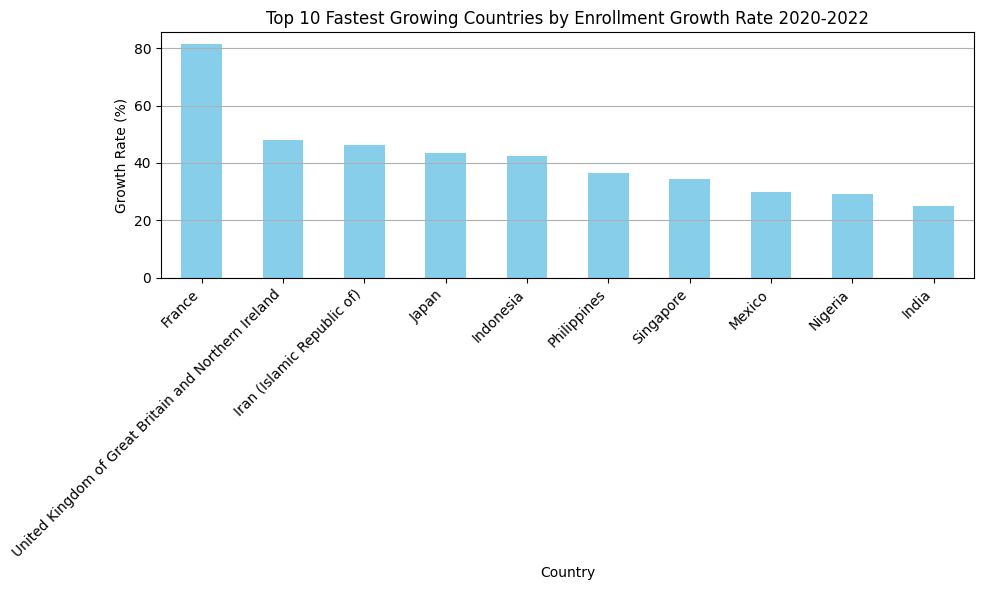

In [63]:
growth_rates.nlargest(10).plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Top 10 Fastest Growing Countries by Enrollment Growth Rate 2020-2022')
plt.xlabel('Country')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\Dewang\AppData\Local\Temp\ipykernel_10064\1222126664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
C:\Users\Dewang\AppData\Local\Temp\ipykernel_10064\1222126664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')


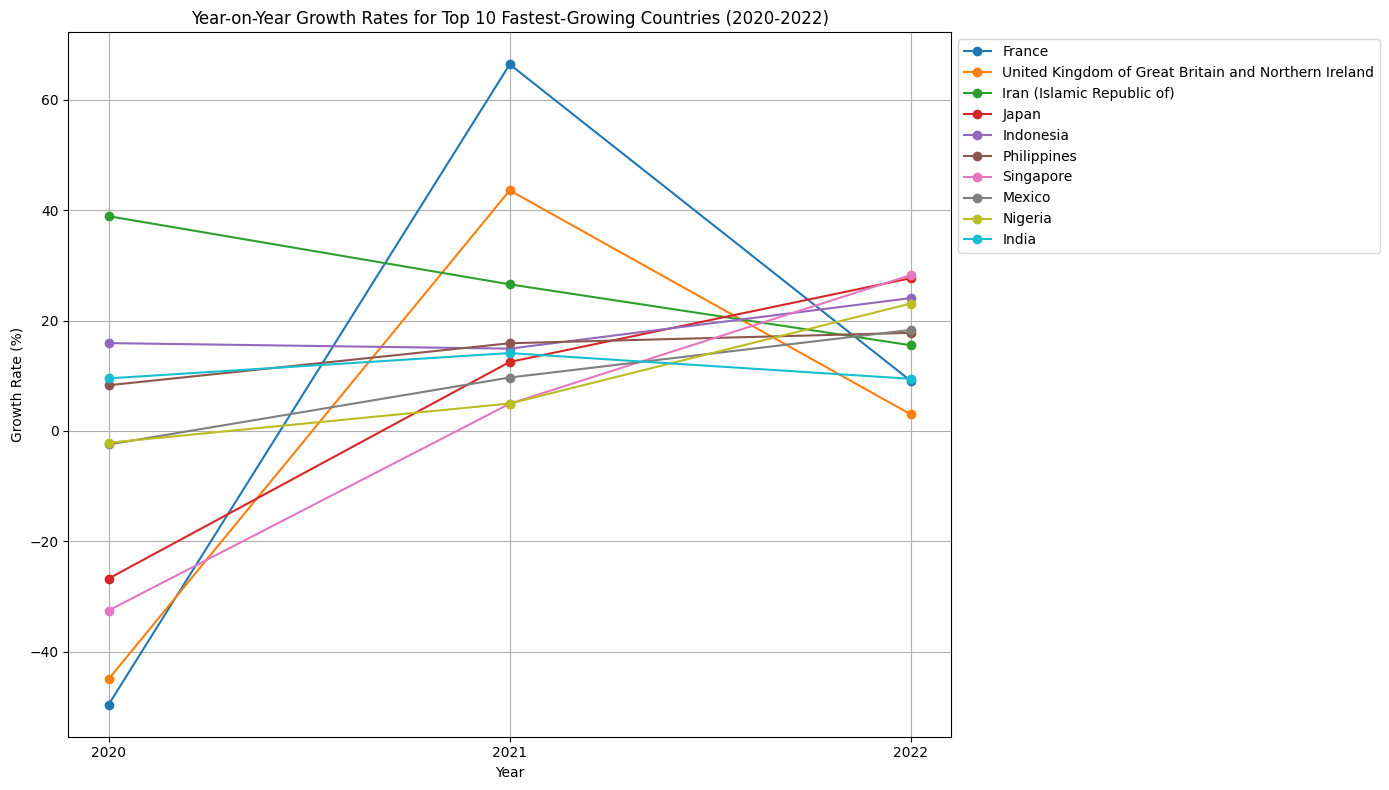

In [64]:
# Convert 'Year' and 'Enrollment' to numeric if they're not already
data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')

# Pivot data to have years as columns for each country
pivot_df = data_long.pivot_table(index='Country', columns='Year', values='Enrollment', aggfunc='sum')

# Calculate year-on-year percentage growth for each country
year_on_year_growth = pivot_df.pct_change(axis=1) * 100

# Filter for only the top 10 countries
top_10_growth = year_on_year_growth.loc[growth_rates.nlargest(10).index]

# Plotting
plt.figure(figsize=(14, 8))

# Ensure the DataFrame is not empty
if not top_10_growth.empty:
    # Plotting only for the specified range of years
    for country in growth_rates.nlargest(10).index:
        # Some countries might not have complete data for all years, leading to NaN values in year-on-year growth.
        # Ensure there's data for at least one year before attempting to plot.
        if country in top_10_growth.index and not top_10_growth.loc[country, start_year:last_year].isnull().all():
            plt.plot(top_10_growth.loc[country, start_year:last_year].index, top_10_growth.loc[country, start_year:last_year], marker='o', label=country)
        else:
            print(f"Skipping {country} due to insufficient data.")

    plt.title(f'Year-on-Year Growth Rates for Top 10 Fastest-Growing Countries ({start_year}-{last_year})')
    plt.xlabel('Year')
    plt.ylabel('Growth Rate (%)')
    # Set x-ticks to the specified range
    plt.xticks(range(start_year, last_year + 1))
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for the top 10 countries.")

Country
(blank)                           The University of Victoria
Afghanistan    The University of British Columbia (Okanagan)
Albania        The University of British Columbia (Okanagan)
Algeria                           Thompson Rivers University
Andorra                               Royal Roads University
                                   ...                      
Viet Nam                             Simon Fraser University
Yemen          The University of British Columbia (Okanagan)
Yugoslavia                            Royal Roads University
Zambia                                Royal Roads University
Zimbabwe                          Thompson Rivers University
Length: 192, dtype: object


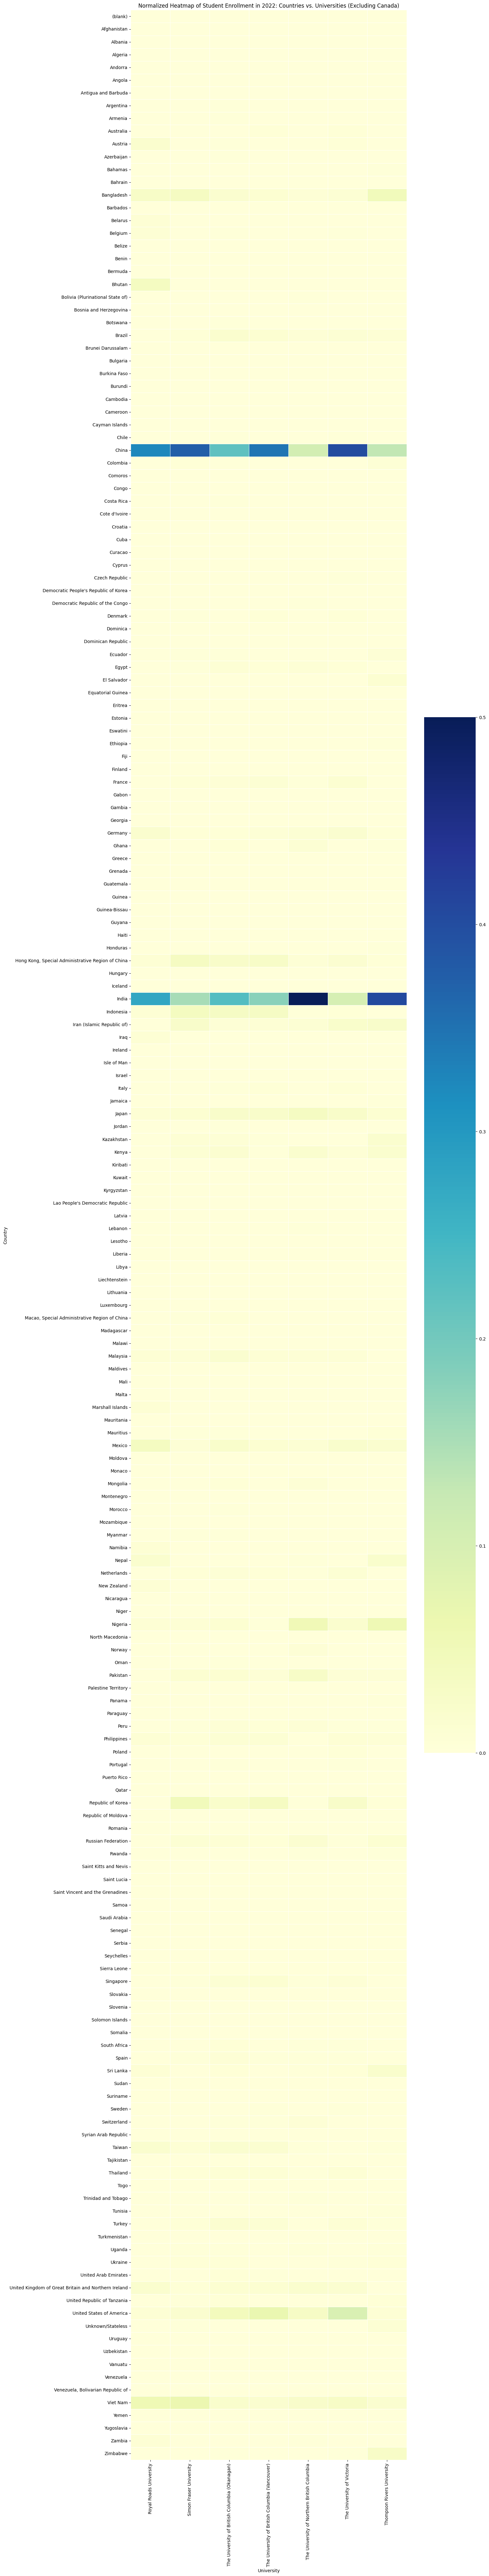

In [65]:
analysis_year = 2022

# Filter the DataFrame for the analysis year
year_data = data_long[data_long['Year'] == analysis_year]

# Aggregate the data by 'Country' and 'University' for the selected year
country_uni_enrollment = year_data.groupby(['Country', 'University'])['Enrollment'].sum().reset_index()

# Normalize the data by the total enrollment at each university
total_enrollment_by_uni = country_uni_enrollment.groupby('University')['Enrollment'].sum().reset_index()
normalized_enrollment = country_uni_enrollment.set_index('University').join(total_enrollment_by_uni.set_index('University'), on='University', rsuffix='_total')
normalized_enrollment['Normalized_Enrollment'] = normalized_enrollment['Enrollment'] / normalized_enrollment['Enrollment_total']

# Pivot the normalized data to get a matrix of countries vs. universities
normalized_pivot = normalized_enrollment.pivot_table(index='Country', columns='University', values='Normalized_Enrollment', fill_value=0)

top_uni_by_country = normalized_pivot.idxmax(axis=1)
print(top_uni_by_country)

# Visualize the relationship using a heatmap
plt.figure(figsize=(14, 100))
sns.heatmap(normalized_pivot, cmap="YlGnBu", linewidths=.5)
plt.title(f'Normalized Heatmap of Student Enrollment in {analysis_year}: Countries vs. Universities (Excluding Canada)')
plt.xlabel('University')
plt.ylabel('Country')
plt.show()

c:\Users\Dewang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Dewang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Dewang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Dewang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

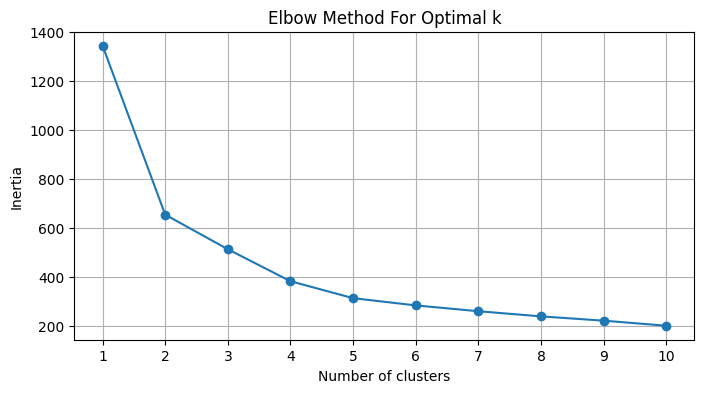

In [66]:
country_uni_matrix = data_long.pivot_table(index='Country', columns='University', values='Growth_Since_2013', aggfunc='sum', fill_value=0)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(country_uni_matrix)

# Use the Elbow Method to find a good number of clusters (k)
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [67]:
# Assuming you've chosen an appropriate k based on the Elbow Method
optimal_k = 2

# Perform k-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels back to the original data
country_uni_matrix['Cluster'] = clusters

# Visualize the clusters
# For simplicity, let's look at the size of each cluster
cluster_sizes = country_uni_matrix['Cluster'].value_counts()
print(cluster_sizes)

# Optionally, explore the countries in each cluster
for i in range(optimal_k):
    print(f"\nCountries in Cluster {i}:")
    print(country_uni_matrix[country_uni_matrix['Cluster'] == i].index.tolist())


Cluster
0    191
1      1
Name: count, dtype: int64

Countries in Cluster 0:
['(blank)', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cayman Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemal

c:\Users\Dewang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


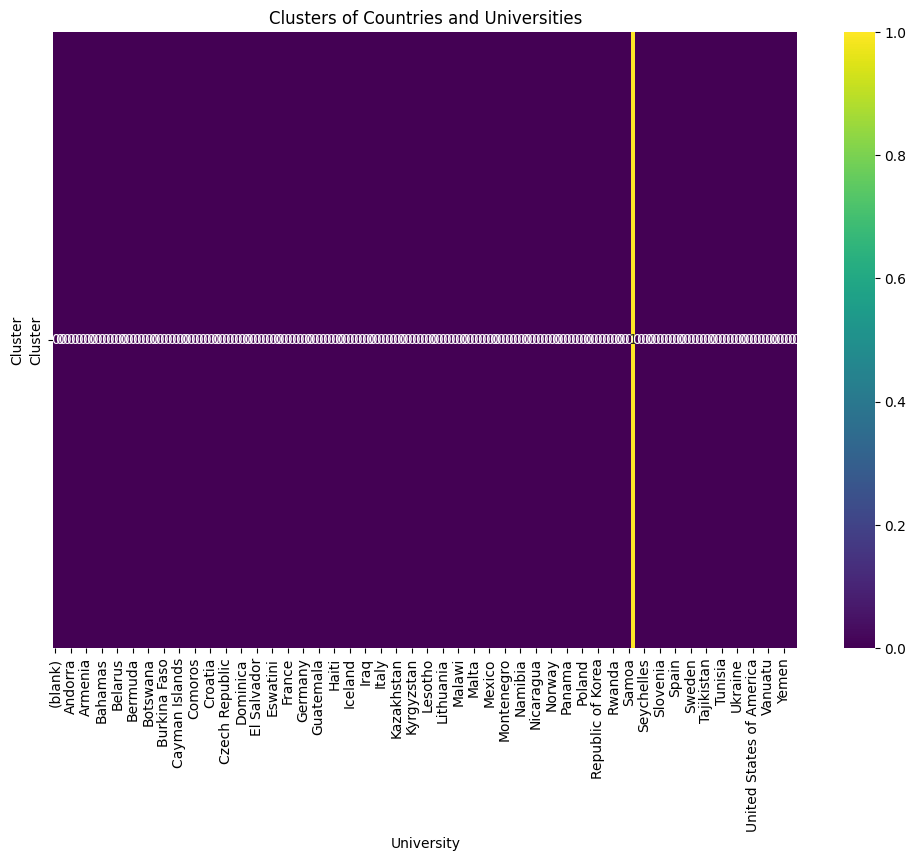

In [68]:
plt.figure(figsize=(12, 8))
sns.heatmap(country_uni_matrix['Cluster'].to_frame().T, cmap='viridis', annot=True, fmt='d')
plt.title('Clusters of Countries and Universities')
plt.xlabel('University')
plt.ylabel('Cluster')
plt.show()

c:\Users\Dewang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster
2    93
0    64
4    21
3    11
5     2
1     1
Name: count, dtype: int64

Countries in Cluster 0:
['(blank)', 'Afghanistan', 'Albania', 'Algeria', 'Antigua and Barbuda', 'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Barbados', 'Belarus', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Burkina Faso', 'Burundi', 'Cambodia', 'Colombia', "Cote d'Ivoire", 'Curacao', 'Czech Republic', 'Democratic Republic of the Congo', 'Dominica', 'Ecuador', 'El Salvador', 'Ethiopia', 'Greece', 'Guyana', 'Honduras', 'Hong Kong, Special Administrative Region of China', 'Hungary', 'Iraq', 'Jamaica', 'Jordan', "Lao People's Democratic Republic", 'Lebanon', 'Liberia', 'Lithuania', 'Malawi', 'Malaysia', 'Mauritius', 'Mexico', 'Morocco', 'Mozambique', 'Nepal', 'Pakistan', 'Panama', 'Portugal', 'Qatar', 'Rwanda', 'Singapore', 'Slovakia', 'South Africa', 'Spain', 'Syrian Arab Republic', 'Tajikistan', 'Togo', 'Trinidad and Tobago', 'Turkey', 'United Arab 

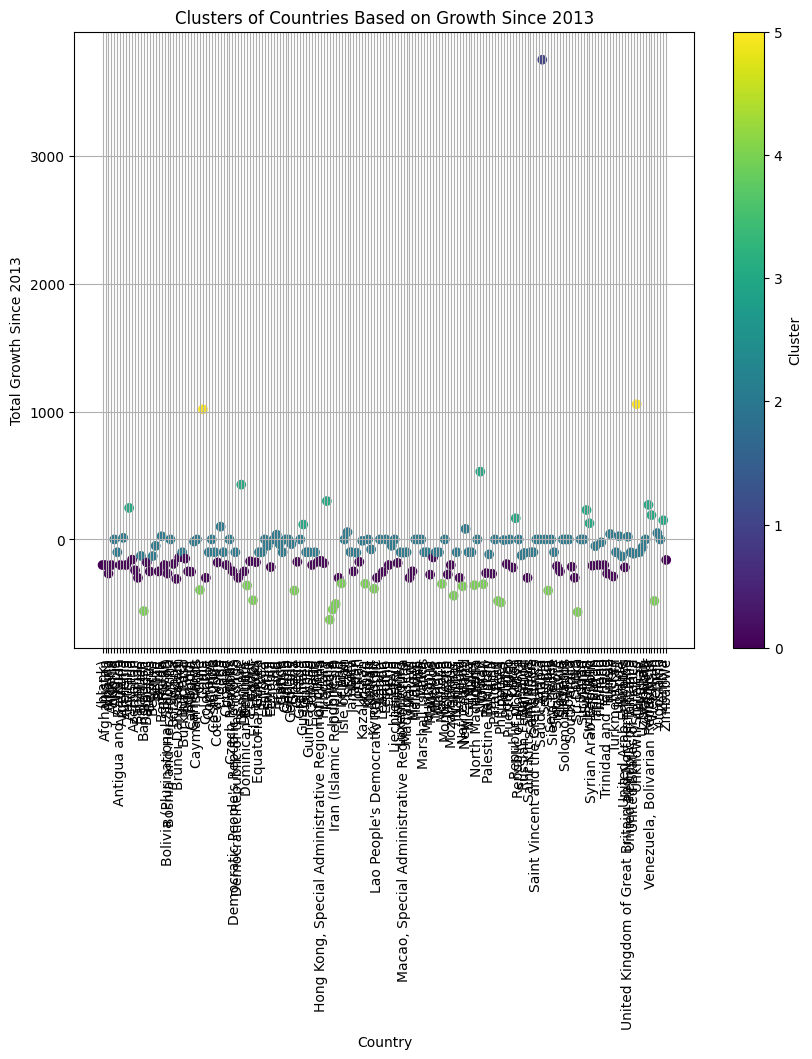

In [69]:
# Aggregate the growth rates for each country since 2013
country_growth = year_data.groupby('Country')['Growth_Since_2013'].sum()

# Standardize the aggregated data
scaler = StandardScaler()
country_growth_scaled = scaler.fit_transform(country_growth.values.reshape(-1, 1))

# Perform k-means clustering
optimal_k = 6  # Choose the optimal number of clusters based on the Elbow Method or other techniques
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
country_clusters = kmeans.fit_predict(country_growth_scaled)

# Add cluster labels back to the original data
country_growth = pd.DataFrame(country_growth)
country_growth['Cluster'] = country_clusters

cluster_sizes = country_growth['Cluster'].value_counts()
print(cluster_sizes)

for i in range(optimal_k):
    print(f"\nCountries in Cluster {i}:")
    print(country_growth[country_growth['Cluster'] == i].index.tolist())

# Visualize the clusters using a scatterplot
plt.figure(figsize=(10, 8))
plt.scatter(country_growth.index, country_growth['Growth_Since_2013'], c=country_clusters, cmap='viridis')
plt.title('Clusters of Countries Based on Growth Since 2013')
plt.xlabel('Country')
plt.ylabel('Total Growth Since 2013')
plt.xticks(rotation=90)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [70]:
year_data

,Country,University,Year,Enrollment,Enrollment_2013,Growth_Since_2013
7992,Afghanistan,Simon Fraser University,2022,0.0,0.0,NaN
7993,Afghanistan,The University of British Columbia (Okanagan),2022,2.0,0.0,-100.000000
7994,Afghanistan,The University of British Columbia (Vancouver),2022,2.0,0.0,-100.000000
7995,Afghanistan,The University of Victoria,2022,0.0,0.0,NaN
7996,Afghanistan,Thompson Rivers University,2022,0.0,1.0,NaN
...,...,...,...,...,...,...
8874,Unknown/Stateless,The University of British Columbia (Okanagan),2022,2.0,0.0,-100.000000
8875,Unknown/Stateless,The University of British Columbia (Vancouver),2022,6.0,45.0,650.000000
8876,Unknown/Stateless,The University of Northern British Columbia,2022,0.0,0.0,NaN
8877,Unknown/Stateless,The University of Victoria,2022,0.0,17.0,NaN


In [71]:
data_long

,Country,University,Year,Enrollment,Enrollment_2013,Growth_Since_2013
0,Afghanistan,Simon Fraser University,2013,0.0,0.0,NaN
1,Afghanistan,The University of British Columbia (Okanagan),2013,0.0,0.0,NaN
2,Afghanistan,The University of British Columbia (Vancouver),2013,0.0,0.0,NaN
3,Afghanistan,The University of Victoria,2013,0.0,0.0,NaN
4,Afghanistan,Thompson Rivers University,2013,1.0,1.0,0.000000
...,...,...,...,...,...,...
8874,Unknown/Stateless,The University of British Columbia (Okanagan),2022,2.0,0.0,-100.000000
8875,Unknown/Stateless,The University of British Columbia (Vancouver),2022,6.0,45.0,650.000000
8876,Unknown/Stateless,The University of Northern British Columbia,2022,0.0,0.0,NaN
8877,Unknown/Stateless,The University of Victoria,2022,0.0,17.0,NaN


# Cluster - %age Growth Since 2013

In [84]:
total_enrollment_2013 = data_long[data_long['Year'] == 2013].groupby('Country')['Enrollment'].sum()
total_enrollment_analysis_year = data_long[data_long['Year'] == analysis_year].groupby('Country')['Enrollment'].sum()

# Calculate the percentage growth for each country from 2013 to the analysis year
# If total_enrollment_2013 is 0, treat it as 1 for the calculation
percentage_growth = ((total_enrollment_analysis_year - total_enrollment_2013) / total_enrollment_2013.replace(0, 1)) * 100

# Ensure the index from total_enrollment_analysis_year is used to include countries that might not be present in 2013 but are in the analysis year
percentage_growth = percentage_growth.reindex(total_enrollment_analysis_year.index, fill_value=0)

percentage_growth_df = percentage_growth.reset_index().rename(columns={0: 'Growth_Percentage'})

In [85]:
percentage_growth_df

,Country,Enrollment
0,(blank),200.000000
1,Afghanistan,300.000000
2,Albania,400.000000
3,Algeria,300.000000
4,Andorra,0.000000
...,...,...
187,Viet Nam,437.681159
188,Yemen,0.000000
189,Yugoslavia,-100.000000
190,Zambia,-31.578947


In [87]:
percentage_growth

Country
(blank)        200.000000
Afghanistan    300.000000
Albania        400.000000
Algeria        300.000000
Andorra          0.000000
                  ...    
Viet Nam       437.681159
Yemen            0.000000
Yugoslavia    -100.000000
Zambia         -31.578947
Zimbabwe       232.608696
Name: Enrollment, Length: 192, dtype: float64

In [80]:
analysis_year=2022

c:\Users\Dewang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


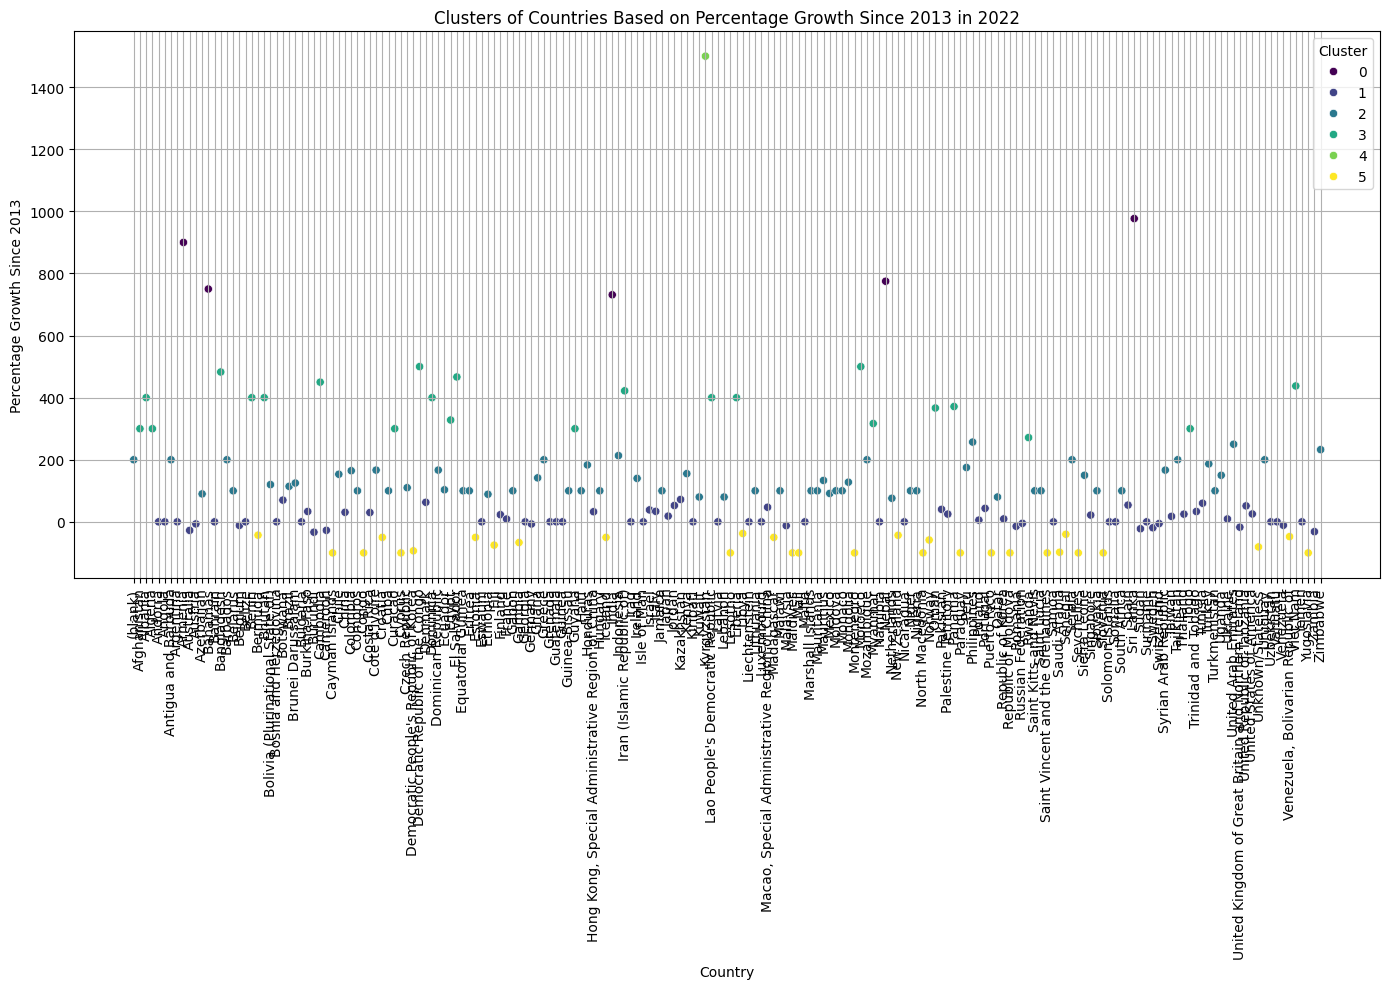

In [88]:
# Standardize the percentage growth values
scaler = StandardScaler()
percentage_growth_scaled = scaler.fit_transform(percentage_growth.values.reshape(-1, 1))

# Perform KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(percentage_growth_scaled)

# Create a DataFrame for plotting
percentage_growth_df = pd.DataFrame({
    'Country': percentage_growth.index,
    'Percentage_Growth': percentage_growth.values,
    'Cluster': clusters
})

# Now you can plot the scatterplot with the 'Cluster' column
plt.figure(figsize=(14, 10))
sns.scatterplot(data=percentage_growth_df, x='Country', y='Percentage_Growth', hue='Cluster', palette='viridis')
plt.title(f'Clusters of Countries Based on Percentage Growth Since 2013 in {analysis_year}')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Percentage Growth Since 2013')
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()
